In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = pd.read_csv("Data_for_UCI_named.csv")

In [ ]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [ ]:
# Encode the target variable using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['stabf'] = le.fit_transform(data['stabf'])

# Perform one-hot encoding if necessary
categorical_columns = ['tau1', 'tau2']
data = pd.get_dummies(data, columns=categorical_columns)

# Split features and target variable
X = data.drop(columns=['stabf'])
y = data['stabf']



In [ ]:
data.head()

,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,...,tau2_9.99060631804166,tau2_9.99224357752397,tau2_9.99321284475693,tau2_9.99426343668363,tau2_9.99498842202375,tau2_9.99583637345328,tau2_9.99680198776068,tau2_9.99790713117815,tau2_9.99829123648624,tau2_9.99983655621537
0,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,...,False,False,False,False,False,False,False,False,False,False
1,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,...,False,False,False,False,False,False,False,False,False,False
2,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,...,False,False,False,False,False,False,False,False,False,False
3,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,...,False,False,False,False,False,False,False,False,False,False
4,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 20012 entries, tau3 to tau2_9.99983655621537
dtypes: bool(20000), float64(11), int64(1)
memory usage: 191.7 MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
d
# Define preprocessing steps for numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression
# Linear Regression
linear_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression_model.fit(X_train, y_train)

# Evaluate Linear Regression model
y_train_pred = linear_regression_model.predict(X_train)
y_test_pred = linear_regression_model.predict(X_test)

print("Linear Regression:")
print("Training R^2 Score:", r2_score(y_train, y_train_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Testing R^2 Score:", r2_score(y_test, y_test_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))


Linear Regression:
Training R^2 Score: 0.6892020495238678
Training MSE: 0.0721083830327247
Testing R^2 Score: 0.6863254548945095
Testing MSE: 0.07102775822596077


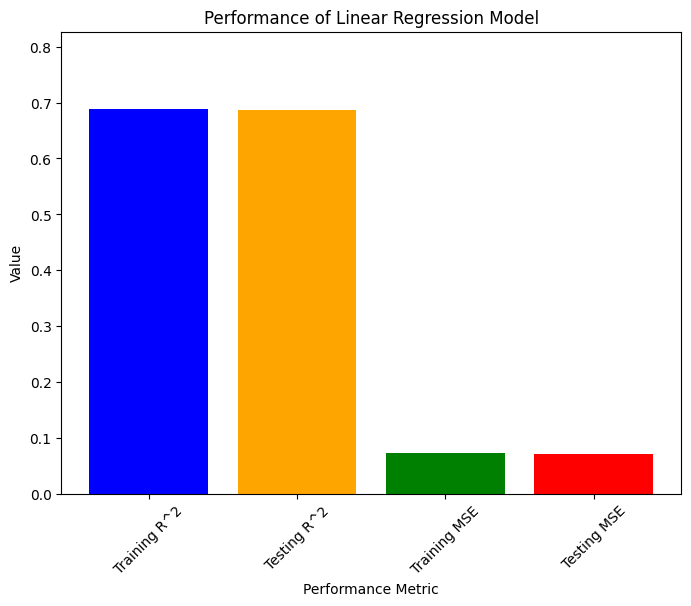

In [ ]:
# Performance metrics
training_r2 = r2_score(y_train, y_train_pred)
testing_r2 = r2_score(y_test, y_test_pred)
training_mse = mean_squared_error(y_train, y_train_pred)
testing_mse = mean_squared_error(y_test, y_test_pred)

# Data for the bar graph
metrics = ['Training R^2', 'Testing R^2', 'Training MSE', 'Testing MSE']
values = [training_r2, testing_r2, training_mse, testing_mse]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Performance Metric')
plt.ylabel('Value')
plt.title('Performance of Linear Regression Model')
plt.ylim(0, max(values) * 1.2)  # Set y-axis limit to ensure all bars are visible
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
from sklearn.linear_model import RANSACRegressor
# RANSAC Regression
ransac_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RANSACRegressor(max_trials=100))
])

ransac_regression_model.fit(X_train, y_train)

# Evaluate RANSAC Regression model
y_train_pred = ransac_regression_model.predict(X_train)
y_test_pred = ransac_regression_model.predict(X_test)

print("\nRANSAC Regression:")
print("Training R^2 Score:", r2_score(y_train, y_train_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Testing R^2 Score:", r2_score(y_test, y_test_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))


RANSAC Regression:
Training R^2 Score: -0.576976148235758
Training MSE: 0.365875
Testing R^2 Score: -0.530221882172915
Testing MSE: 0.3465


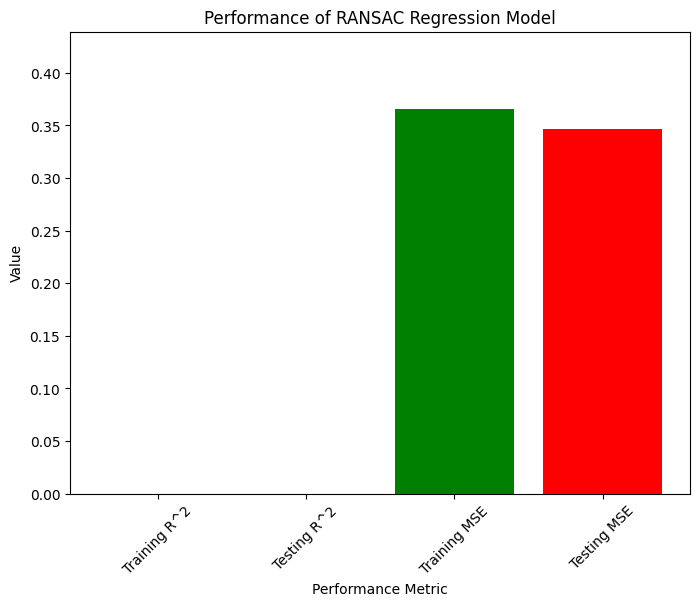

In [ ]:
# Performance metrics
training_r2 = r2_score(y_train, y_train_pred)
testing_r2 = r2_score(y_test, y_test_pred)
training_mse = mean_squared_error(y_train, y_train_pred)
testing_mse = mean_squared_error(y_test, y_test_pred)

# Data for the bar graph
metrics = ['Training R^2', 'Testing R^2', 'Training MSE', 'Testing MSE']
values = [training_r2, testing_r2, training_mse, testing_mse]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Performance Metric')
plt.ylabel('Value')
plt.title('Performance of RANSAC Regression Model')
plt.ylim(0, max(values) * 1.2)  # Set y-axis limit to ensure all bars are visible
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial Regression
polynomial_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

polynomial_regression_model.fit(X_train, y_train)

# Evaluate Polynomial Regression model
y_train_pred = polynomial_regression_model.predict(X_train)
y_test_pred = polynomial_regression_model.predict(X_test)

print("\nPolynomial Regression:")
print("Training R^2 Score:", r2_score(y_train, y_train_pred))
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Testing R^2 Score:", r2_score(y_test, y_test_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))


Polynomial Regression:
Training R^2 Score: 0.7617234557411303
Training MSE: 0.05528265644870146
Testing R^2 Score: 0.7525831546427956
Testing MSE: 0.05602451377478333


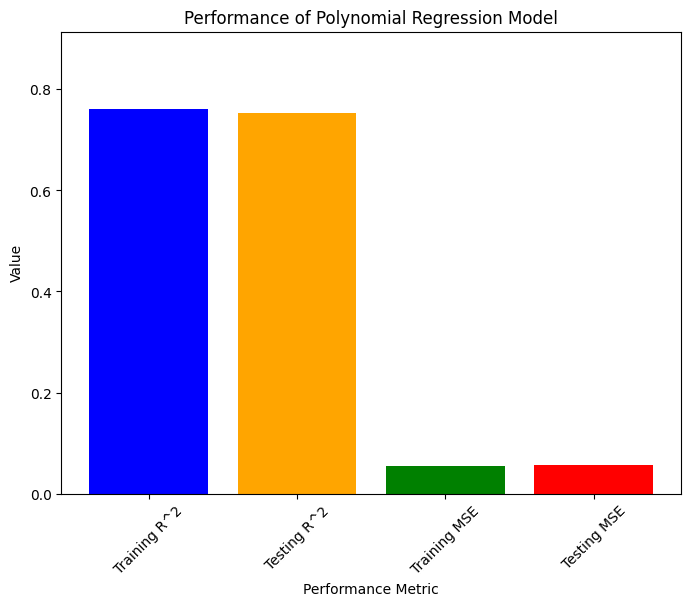

In [ ]:
# Performance metrics
training_r2 = r2_score(y_train, y_train_pred)
testing_r2 = r2_score(y_test, y_test_pred)
training_mse = mean_squared_error(y_train, y_train_pred)
testing_mse = mean_squared_error(y_test, y_test_pred)

# Data for the bar graph
metrics = ['Training R^2', 'Testing R^2', 'Training MSE', 'Testing MSE']
values = [training_r2, testing_r2, training_mse, testing_mse]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Performance Metric')
plt.ylabel('Value')
plt.title('Performance of Polynomial Regression Model')
plt.ylim(0, max(values) * 1.2)  # Set y-axis limit to ensure all bars are visible
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter tuning for Linear Regression using GridSearchCV
param_grid_linear = {'regressor__fit_intercept': [True, False]}

grid_search_linear = GridSearchCV(linear_regression_model, param_grid_linear, cv=5, scoring='r2')
grid_search_linear.fit(X_train, y_train)

print("Linear Regression GridSearchCV Best Parameters:", grid_search_linear.best_params_)
print("Linear Regression GridSearchCV Best Score:", grid_search_linear.best_score_)


Linear Regression GridSearchCV Best Parameters: {'regressor__fit_intercept': True}
Linear Regression GridSearchCV Best Score: 0.6882560122368939


In [ ]:
# Hyperparameter tuning for Polynomial Regression using GridSearchCV
polynomial_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

# Hyperparameter tuning for Polynomial Regression using GridSearchCV
param_grid_poly = {'poly__degree': [1, 2, 3],
                   'regressor__fit_intercept': [True, False]}

grid_search_poly = GridSearchCV(polynomial_regression_model, param_grid_poly, cv=5, scoring='r2')
grid_search_poly.fit(X_train, y_train)

print("\nPolynomial Regression GridSearchCV Best Parameters:", grid_search_poly.best_params_)
print("Polynomial Regression GridSearchCV Best Score:", grid_search_poly.best_score_)



Polynomial Regression GridSearchCV Best Parameters: {'poly__degree': 3, 'regressor__fit_intercept': False}
Polynomial Regression GridSearchCV Best Score: 0.8007614649285155


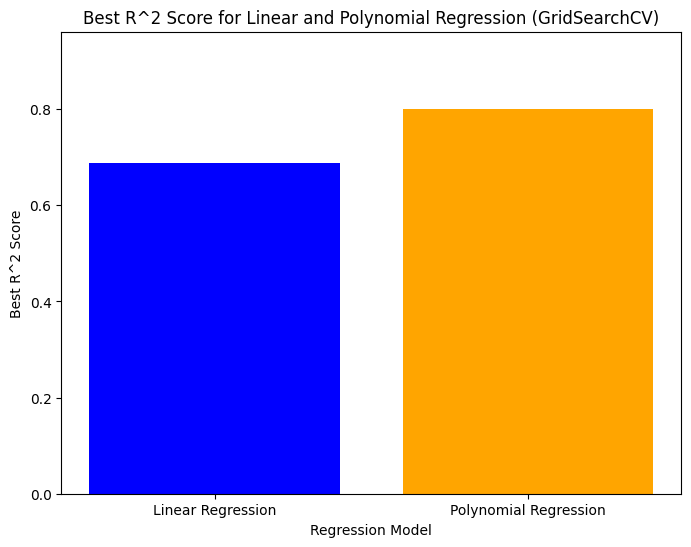

In [ ]:
# Data for the bar graph
models = ['Linear Regression', 'Polynomial Regression']
best_scores = [grid_search_linear.best_score_, grid_search_poly.best_score_]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, best_scores, color=['blue', 'orange'])
plt.xlabel('Regression Model')
plt.ylabel('Best R^2 Score')
plt.title('Best R^2 Score for Linear and Polynomial Regression (GridSearchCV)')
plt.ylim(0, max(best_scores) * 1.2)  # Set y-axis limit to ensure all bars are visible
plt.show()